# Task 5: Population

Author: Irene Celebrin

## Part 1

**Task**: Analyze the differences between the sexes by age in Ireland.
Include: 
- Weighted mean age (by sex) 
- Difference between the sexes by age

In [1]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

### Data import and clean up 

The data is imported from the API to a Pandas dataframe. 

The dataframe includes many columns (or series), which makes it hard to read the whole table. Moreover, most of the series are objects, which means that they are not necessarily numbers (integers). For these reasons, it is best to clean up the data before analysing it. 



In [2]:
# get the data from https://data.cso.ie/ API 
# read from url with pandas: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
df = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/FY006A/CSV/1.0/en')

# show first 5 rows
df.head(5)

,STATISTIC,Statistic Label,TLIST(A1),CensusYear,C02199V02655,Sex,C02076V03371,Single Year of Age,C03789V04537,Administrative Counties,UNIT,VALUE
0,FY006AC01,Population,2022,2022,-,Both sexes,-,All ages,IE0,Ireland,Number,5149139
1,FY006AC01,Population,2022,2022,-,Both sexes,-,All ages,2ae19629-1492-13a3-e055-000000000001,Carlow County Council,Number,61968
2,FY006AC01,Population,2022,2022,-,Both sexes,-,All ages,2ae19629-1433-13a3-e055-000000000001,Dublin City Council,Number,592713
3,FY006AC01,Population,2022,2022,-,Both sexes,-,All ages,2ae19629-149f-13a3-e055-000000000001,Dún Laoghaire Rathdown County Council,Number,233860
4,FY006AC01,Population,2022,2022,-,Both sexes,-,All ages,2ae19629-14a0-13a3-e055-000000000001,Fingal County Council,Number,330506


In [3]:
# show columns (series) and data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9792 entries, 0 to 9791
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   STATISTIC                9792 non-null   object
 1   Statistic Label          9792 non-null   object
 2   TLIST(A1)                9792 non-null   int64 
 3   CensusYear               9792 non-null   int64 
 4   C02199V02655             9792 non-null   object
 5   Sex                      9792 non-null   object
 6   C02076V03371             9792 non-null   object
 7   Single Year of Age       9792 non-null   object
 8   C03789V04537             9792 non-null   object
 9   Administrative Counties  9792 non-null   object
 10  UNIT                     9792 non-null   object
 11  VALUE                    9792 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 918.1+ KB


**Data clean-up** 

The following operations are performed to clean up the data: 
- unnecessary columns are removed (this makes it easier to read the data),
- rows including cumulstive data are removed (they would alter mathematical calculations and plots),
- non-numerical data is replaced with integers (this prevents issues from arising, when computing or plotting the data)

Finally, the new datatypes are displayed to verify that numberical values are integers. 

In [4]:
# remove unecessary columns. See: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html 
col_to_drop = ['STATISTIC', 'Statistic Label','TLIST(A1)','CensusYear','C02199V02655','C02076V03371','C03789V04537','UNIT']
df = df.drop(columns=col_to_drop)

In [5]:
# remove unneeded rows
# select only rows where 'Single Year of Age' is not 'All ages' and 'All Sexes' 
df = df[df['Single Year of Age'] != 'All ages']
df = df[df['Sex'] != 'Both sexes']
df = df[df['Administrative Counties'] != 'Ireland']

In [6]:
# re-format year value from "Under 1 year" to 0 and remove non-numerical characters
# see: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html
df['Single Year of Age'] = df['Single Year of Age'].str.replace('Under 1 year', '0')
# see: https://pandas.pydata.org/docs/reference/api/pandas.Series.replace.html
df['Single Year of Age'] = df['Single Year of Age'].replace('[^[0-9]','', regex=True) 

In [7]:
# make 'Single Year of Age' an integer
# see: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
df['Single Year of Age'] = df['Single Year of Age'].astype(int)

In [8]:
# verify new columns and value types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6262 entries, 3297 to 9791
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Sex                      6262 non-null   object
 1   Single Year of Age       6262 non-null   int64 
 2   Administrative Counties  6262 non-null   object
 3   VALUE                    6262 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 244.6+ KB


### Weighted mean age

First, subsets are selected from the dataframe to isolate male and female age.   

Then, the library Numpy is used to calculate the **weighted mean age by sex**. 

The weighted mean (or weighted average) is a statistical measure used to determine the average of a set of numbers, where each number is multiplied by a predetermined weight before calculating the average (https://www.geeksforgeeks.org/maths/weighted-mean-formula/). The difference from the standard mean is that data points are attributed different weights; the weight can be different for different quantities (as in this case), or it can be associated to other priority criteria. In this case, if more people have a certain age, that age number has a higher "weight". 

In [9]:
# create subset for age by sex
male_age = df[df['Sex'] == 'Male']['Single Year of Age']
female_age = df[df['Sex'] == 'Female']['Single Year of Age']

# create subset for weights by sex 
male_wt = df[df['Sex'] == 'Male']['VALUE']
female_wt = df[df['Sex'] == 'Female']['VALUE']

In [10]:
# use nympy to calculate weighted_age_average by sex. 
# see: https://numpy.org/doc/2.1/reference/generated/numpy.average.html 
male_weighted_age = np.average(male_age, weights = male_wt)
female_weighted_age = np.average(female_age, weights = female_wt)

# print the results
print(f"Men's weighted mean age:\t{male_weighted_age:.2f} years\nWomen's weighted mean age:\t{female_weighted_age:.2f} years")

Men's weighted mean age:	37.74 years
Women's weighted mean age:	38.94 years


Overall, weighted mean age in Ireland does not vary much by sex
. Female mean age is slightly higher, but it is also known that women tend to live longer than men. 

Moreover, Ireland's population looks quite young (for European standards, at least). Interestingly, official data on age trends in Europe mostly looks at median age, rather than mean age, so it's not possible to make comparisons. However, as for median age, Ireland does have the lowest median age in Europe (https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Population_structure_and_ageing#Median_age_is_highest_in_Italy_and_lowest_in_Ireland), and it looks like Ireland's median age is quite similar to its weighted mean age (around 37 years). 

### Sex and Age

To analyse age trends between the sexes, the data is further manipulated to create a **pivot table**. In this way, it is possible to display age as index of the table (or dataframe), sex as columns and the population as values. 

The pivot table is saved in the folder "data" as "05_population_pivot.csv", and a plot is created to show age trends in men and women, in Ireland.

In [11]:
# view population by sex and age group. 
# create pivot table with age as index and sex as columns: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html 
df_analysis = df.pivot_table(
    values='VALUE',
    index='Single Year of Age',
    columns='Sex',
    aggfunc='sum'   # sum across duplicates (e.g., regions)
)

# save to csv 
df_analysis.to_csv('./data/05_population_pivot.csv')

In [12]:
# show pivot table
df_analysis

Sex,Female,Male
Single Year of Age,,
0,28186,29610
1,27545,28875
2,28974,30236
3,29483,31001
4,29819,31686
...,...,...
96,956,327
97,732,217
98,492,130


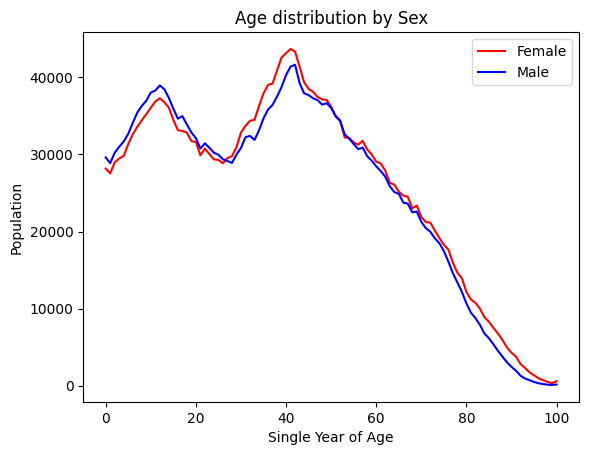

In [13]:
# plot age trends by sex 

# create arrays for the axes 
age = df_analysis.index
female_population = df_analysis['Female']
male_population = df_analysis['Male']

# plot the data 
# see: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html 
fig, ax = plt.subplots()
ax.plot(age, female_population, label='Female', color = 'red')
ax.plot(age, male_population, label='Male', color = 'blue')
ax.set_xlabel('Single Year of Age')
ax.set_ylabel('Population')
plt.legend()
plt.title('Age distribution by Sex')
plt.show()

The plot shows male and female population in Ireland. The lines are always quite close, showing that age trends between the Sexes are comparable: 
- a spike in teenagers years, 
- a population reduction in the age group 20-30 years, 
- an increase again in the group 30-early 40s, 
- a gradual decrease after the early 40s. 

However, some differences include: 
- male population is higher than female population in the age group 0-20 years, 
- on the other hand, female population is higher in the age group 30-early 40s,
- female population becomes higher throughout the third age, which shows again that women tend to live longer than men. 

**Population difference by age**

In this section, the difference in population *between the sexes* and *by age* is calculated. 

First, the total difference between male and female population is calculated: unsurprisingly, the female population is higher. 

Then, a new pivot table is created to add the difference as third column, and saved in the folder "data". The difference is plotted show, for each age, the difference in population by sex. 

In [14]:
# Analyse population difference

# Calculate total male and female population, and population difference by sex 
total_male_population = df_analysis['Male'].sum()
total_female_population = df_analysis['Female'].sum()

print(f'Total male population in Ireland:\t\t{total_male_population}')
print(f'Total female population in Ireland:\t\t{total_female_population}')
print(f'Population difference by age (male - female):\t{total_male_population - total_female_population}')

Total male population in Ireland:		2544549
Total female population in Ireland:		2604590
Population difference by age (male - female):	-60041


In [15]:
# Add population difference to the pivot table
df_analysis['Difference'] = df_analysis['Male'] - df_analysis['Female']

# Show population difference 
df_analysis.head(5)

# Save to csv 
df_analysis.to_csv('./data/05_population_pivot_with_difference.csv')

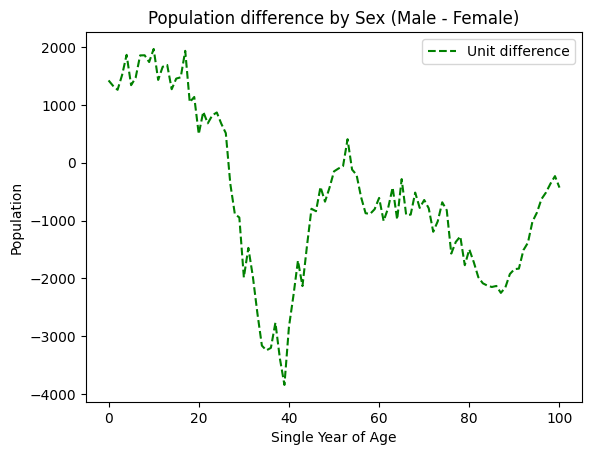

In [16]:
# Plot population difference
fig, ax = plt.subplots()
ax.plot(age, df_analysis['Difference'], label='Unit difference', color = 'green', linestyle='--')
ax.set_xlabel('Single Year of Age')
ax.set_ylabel('Population')
plt.legend()
plt.title('Population difference by Sex (Male - Female)')
plt.show()

The plot confirms the trends observed above: 
- a higher male population in the age group 0-20 (positive numbers),
- after, the number is mostly negative, becasue the female population is higher.

## Part 2 
**Task**: Make a variable that stores an age (say 35).

Write that code that would group the people within 5 years of that age together, into one age group 

Calculate the population difference between the sexes in that age group.

First, a subset from the pivot table is selected, extracting only the rows corresponding to age 30-40. 

The total population in the age group is calculated, showing that female population is higher than male population, and the data is plotted.  
The difference is also calculated and plotted. 


In [17]:
#  Create variable for 35 years
age_target = 35 

# Select dataframe subset for age group (30 +- 5)
age_group_analysis = df_analysis[(df_analysis.index <= age_target + 5) & (df_analysis.index >= age_target - 5)]
# show dataframe
age_group_analysis

Sex,Female,Male,Difference
Single Year of Age,,,
30,32841,30858,-1983
31,33710,32237,-1473
32,34382,32413,-1969
33,34489,31888,-2601
34,36284,33121,-3163
35,37940,34695,-3245
36,39030,35828,-3202
37,39193,36427,-2766
38,40902,37513,-3389


In [18]:
# Create arrays for men and female population aged 30-40
age_group_male_total = age_group_analysis['Male'].sum()
age_group_female_total = age_group_analysis['Female'].sum()
# calculate difference 
age_group_difference = age_group_male_total - age_group_female_total

print(f'Male population aged 30-40:\t\t{age_group_male_total}')
print(f'Female population aged 30-40:\t\t{age_group_female_total}')
print(f'Population difference (male - female):\t{age_group_difference}')

Male population aged 30-40:		384030
Female population aged 30-40:		414506
Population difference (male - female):	-30476


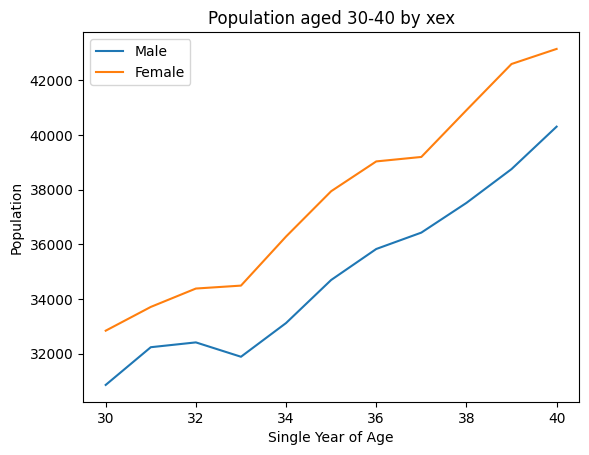

In [19]:
# Plot population aged 30-40 by sex 

# set variables 
age_group = age_group_analysis.index
age_group_male = age_group_analysis['Male']
age_group_female = age_group_analysis['Female']

# plot the data
fig, ax = plt.subplots()
ax.plot(age_group, age_group_male, label = "Male")
ax.plot(age_group, age_group_female, label= 'Female')
ax.set_xlabel('Single Year of Age')
ax.set_ylabel('Population')
plt.legend()
plt.title('Population aged 30-40 by x' \
'ex')
plt.show()

The plot shows that the difference between female and male population is smaller at the beginning of the interval, around 32y it grows and remains pretty unchanged after that. 

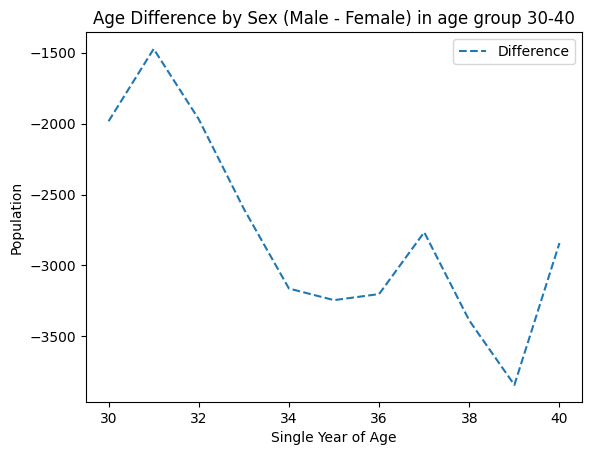

In [20]:
# Plot the difference in population aged 30-40 by sex 
fig, ax = plt.subplots()
ax.plot(age_group, age_group_analysis['Difference'], label='Difference', linestyle='--')
ax.set_xlabel('Single Year of Age')
ax.set_ylabel('Population')
plt.legend()
plt.title('Age Difference by Sex (Male - Female) in age group 30-40')
plt.show()

## Part 3
**Task**: Write the code that would work out which region in Ireland has the biggest population difference between the sexes in that age group. 


A subset of the original dataframe is used, including the population included in the age range 30-40. 
A list of all the counties in the Dataset is extracted: for each element in the list, the total male and female population, and the difference, are calculated, and the values stored in a list. 

In [21]:
# select subset of original dataframe for age group 30-40
df_age_group = df[(df['Single Year of Age'] >= 30) & (df['Single Year of Age'] <= 40 )]

# show first 5 rows
df_age_group.head()

,Sex,Single Year of Age,Administrative Counties,VALUE
4257,Male,30,Carlow County Council,367
4258,Male,30,Dublin City Council,6163
4259,Male,30,Dún Laoghaire Rathdown County Council,1511
4260,Male,30,Fingal County Council,1888
4261,Male,30,South Dublin County Council,1819


In [22]:

# get list of counties 
counties = df_age_group['Administrative Counties'].unique()

# show counties
counties

array(['Carlow County Council', 'Dublin City Council',
       'Dún Laoghaire Rathdown County Council', 'Fingal County Council',
       'South Dublin County Council', 'Kildare County Council',
       'Kilkenny County Council', 'Laois County Council',
       'Longford County Council', 'Louth County Council',
       'Meath County Council', 'Offaly County Council',
       'Westmeath County Council', 'Wexford County Council',
       'Wicklow County Council', 'Clare County Council',
       'Cork City Council', 'Cork County Council', 'Kerry County Council',
       'Limerick City & County Council', 'Tipperary County Council',
       'Waterford City & County Council', 'Galway City Council',
       'Galway County Council', 'Leitrim County Council',
       'Mayo  County Council', 'Roscommon County Council',
       'Sligo County Council', 'Cavan County Council',
       'Donegal County Council', 'Monaghan County Council'], dtype=object)

In [23]:
# create empty list for population difference by county
population_differences = []

for county in counties: 
    # select male and female population for each county
    # see = https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html 
    county_male_population = df_age_group.loc[(df_age_group['Administrative Counties'] == county) & (df_age_group['Sex'] == 'Male'), 'VALUE'].sum()
    county_female_population = df_age_group.loc[(df_age_group['Administrative Counties'] == county) & (df_age_group['Sex'] == 'Female'), 'VALUE'].sum()
    population_difference = county_male_population - county_female_population

    # add to list 
    population_differences.append(population_difference)

A 2D Nunmpy array is created, combining the county names and the population difference. 
Then, max and min values in the second dimension are calculated. Finally, their index is used to get the county names. 

The result: the county with the max. difference in male and female population is **Fingal County Council, with -2942 more males then female units**. 
On the other hand, in **Dublin City Council there is the highest majority of male vs female population, with 1036 male inhabitants more than the female inhabitants**. 

In [24]:
# stack the county and population difference arrays together for analysis 
# see: https://numpy.org/doc/2.3/reference/generated/numpy.stack.html
counties_difference = np.stack((counties, population_differences), axis=0)

# find max and min values in the list
# see: https://numpy.org/doc/stable/reference/generated/numpy.max.html
# see: https://numpy.org/doc/stable/reference/generated/numpy.min.html
max_difference = counties_difference[1:].max()
min_difference = counties_difference[1:].min()
# find position of max and min values
# see: https://numpy.org/doc/2.3/reference/generated/numpy.where.html
max_pos = np.where(counties_difference[1:] == max_difference)
min_pos = np.where(counties_difference[1:] == min_difference)
max_county = counties_difference[0:][max_pos][0]
min_county = counties_difference[0:][min_pos][0]

print(f'Highest difference (males):\n {max_county} with {max_difference} more males then female units.\n')
print(f'Highest difference (females):\n {min_county} with {min_difference} more males then female units.')

Highest difference (males):
 Dublin City Council with 1036 more males then female units.

Highest difference (females):
 Fingal County Council with -2942 more males then female units.
